# Election Scenario

* Candidate A won the state by an average of 4% points, however they lost District 29 to candidate B by 22%, making it a significant outlier. 
* The final results for the distrct are 39% Candidate A, 61% Candidate B. 
* You are tasked to investigate this to determine if it is worth a thorough follow-up.
* You call a a hundred members of the general public who reported as voting. 48 out of the 100 reported voting for Candidate A. 
* What do you report?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

But what question are we actually wanting to answer? Maybe this is a good one:

*What is the chance that more than Candidate A got more votes than reported?*

Or to put this another way: 
* Null Hypothesis - 39% of votes went to Candidate A and 61% to Candidate B
* Alternative Hypothesis - >39% of votes went to Candidate A and <61% to Candidate B

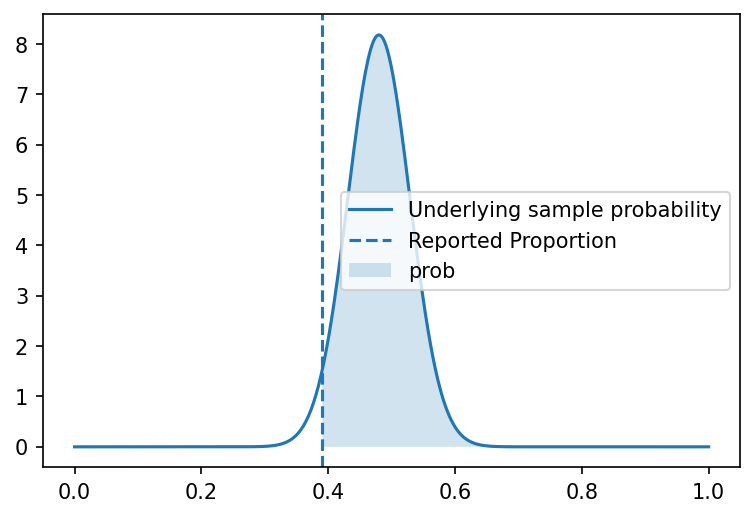

In [4]:
# Notice: 0.39 * 0.61 is basically saying that you have a binomial distribution (p * 1-p)
# sigma is the width
sigma = np.sqrt(0.39 * 0.61 / 100) # 39% candidate A * 0.61 candidate B / 100 people sampled
# Were enough samples taken to approximate this to a normal distribution? That's what proportion testing is
# Approximating a binomial into a normal and performing tests on it
reported = 0.39 # 39% voted for candidate A
sample = 0.48 # samples reported 48%

xs = np.linspace(0, 1, 500) # percentages (500 points sampled from 0% to 100%)
ps = norm.pdf(xs, sample, sigma)
plt.rcParams['figure.dpi'] = 150
plt.plot(xs, ps, label="Underlying sample probability")
plt.axvline(reported, ls="--", label="Reported Proportion")
plt.fill_between(xs, ps, 0, alpha=0.2, where=xs>=reported, label="prob")
plt.legend();
# Note: the gaussian is centered around the sample mean, but it makes no difference if it was centered at the reported value
# A gaussian is symmetric, you can swap between the x-value and the mean, no difference as the math is the same
# In one case you will use the CDF, in the other case you will use the SF

In [5]:
# Integrate from reported proportion onwards to get the area which is the probability that more people voted for A
prob_more = norm.sf(reported, sample, sigma)
print(f"There is a {100 * prob_more:.1f}% chance that Candidate A would have received more votes")

There is a 96.7% chance that Candidate A would have received more votes


In [6]:
# Phrase this in terms of z-score
z_score = (sample - reported) / sigma
z_score_needed_for_significance = norm.ppf(0.95) # what value of x gives you 95% of the area in the CDF
print(f"{z_score:.3f} is larger than {z_score_needed_for_significance:.3f}, so we are significant")
print(f"Have p-value {norm.sf(sample, reported, sigma):.3f}")
# 1.645 is the CDF x value with a p-value of 0.05
# 1.845 is > 1.645 so reject null hypothesis (more than 95% confidence)
# Need to get more samples, obviously 100 isn't enough

1.845 is larger than 1.645, so we are significant
Have p-value 0.033


So what does this mean? We should probably tell our supervisors that this is a significant result (p < 0.05) and warrants a deeper investigation.

Follow up: What if instead of asking *What is the chance that more than Candidate A got more votes than reported?*, we instead asked *What is the chance that more than Candidate A got a significantly different amount of votes than reported?*

I.e., we now move from the one-tail case to the two-tailed? Let's continue assuming someone has asked if it meets $p = 0.05$ criteria

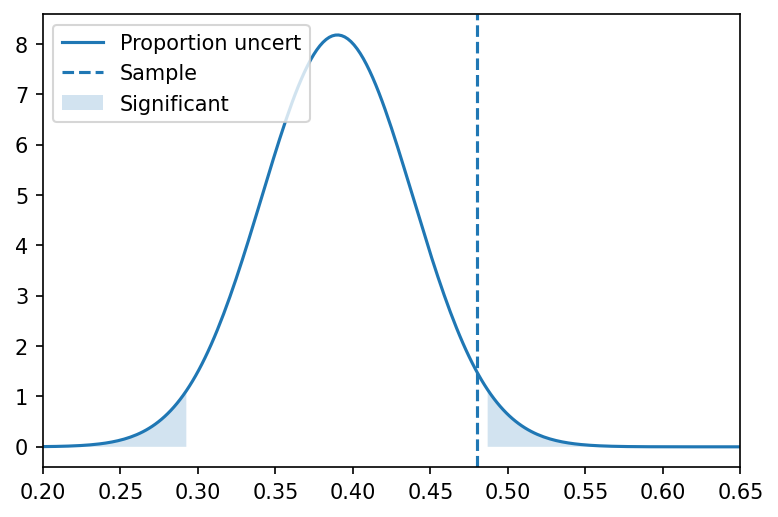

In [7]:
xs = np.linspace(0, 1, 500)
ps = norm.pdf(xs, reported, sigma)

# Here the pdf is the population mean and the vertical line represents the sample mean
# Easier to understand the two-tailed test this way
plt.plot(xs, ps, label="Proportion uncert")
plt.axvline(sample, ls="--", label="Sample")
limits = norm.ppf([0.025, 0.975], reported, sigma) # 0.025 and 0975 add up to 5%/p=0.05, each side has half the area in it
plt.fill_between(xs, ps, 0, alpha=0.2, where=(xs<limits[0])|(xs>limits[1]), label="Significant")
plt.legend(loc=2)
plt.xlim(0.2, 0.65);
# Notice the line no longer intersects the area of significance
# So not significant

In [8]:
# Using z-scores
z_score = (sample - reported) / sigma
z_score_needed_for_significance = norm.ppf(0.975)
print(f"{z_score:.3f} is less than {z_score_needed_for_significance:.3f}, so we aren't significant")

# Using p-values
p_value_two_tailed = 2 * norm.sf(z_score)
print(f"{p_value_two_tailed:.3f} is > 0.05")

1.845 is less than 1.960, so we aren't significant
0.065 is > 0.05


In [9]:
# The one-tailed test says that something is wrong, the two-tailed test says everything is okay...
# Must be careful with what test you use and what p-value you conform to
# Always report the probability number